In [2]:
# Dependencies
import pandas as pd
import json
import requests
from config import api_key
from pandas import json_normalize
from pprint import pprint
import matplotlib.pyplot as plt
import numpy as np
from sqlalchemy import create_engine
import psycopg2

In [3]:
# Save config information
url = "https://api.eia.gov/v2/petroleum/crd/crpdn/data/API_route?api_key="
conditions = "&frequency=monthly&start=2017-05-31&end=2022-07-10&data[]=value&sort[0][column]=period&sort[0][direction]=desc"
conditions2 = "&frequency=monthly&start=2012-06-01&end=2017-05-31&data[]=value&sort[0][column]=period&sort[0][direction]=desc"
conditions3 = "&frequency=monthly&end=2012-06-01&data[]=value&sort[0][column]=period&sort[0][direction]=desc"

# Build query URL
query_url = url + api_key + conditions
query_url2 = url + api_key + conditions2
query_url3 = url + api_key + conditions3

In [4]:
production_response = requests.get(query_url)
production_json = production_response.json()

df_nested_list = pd.json_normalize(production_json["response"], record_path =['data'])
df_nested_list


,period,duoarea,area-name,product,product-name,process,process-name,series,series-description,value,units
0,2022-04,SOK,USA-OK,EPC0,Crude Oil,FPF,Field Production,MCRFPOK2,Oklahoma Field Production of Crude Oil (Thousa...,418,MBBL/D
1,2022-04,SID,USA-ID,EPC0,Crude Oil,FPF,Field Production,M_EPC0_FPF_SID_MBBL,Idaho Field Production of Crude Oil (Thousand ...,2,MBBL
2,2022-04,R5F,NA,EPC0,Crude Oil,FPF,Field Production,MCRFP5F2,Federal Offshore PADD 5 Field Production of Cr...,7,MBBL/D
3,2022-04,SMO,USA-MO,EPC0,Crude Oil,FPF,Field Production,MCRFPMO1,Missouri Field Production of Crude Oil (Thousa...,5,MBBL
4,2022-04,SNV,USA-NV,EPC0,Crude Oil,FPF,Field Production,MCRFPNV1,Nevada Field Production of Crude Oil (Thousand...,20,MBBL
...,...,...,...,...,...,...,...,...,...,...,...
4951,2017-06,SAL,USA-AL,EPC0,Crude Oil,FPF,Field Production,MCRFPAL2,Alabama Field Production of Crude Oil (Thousan...,19,MBBL/D
4952,2017-06,SFL,NA,EPC0,Crude Oil,FPF,Field Production,MCRFPFL2,Florida Field Production of Crude Oil (Thousan...,5,MBBL/D
4953,2017-06,SNM,USA-NM,EPC0,Crude Oil,FPF,Field Production,MCRFPNM2,New Mexico Field Production of Crude Oil (Thou...,443,MBBL/D
4954,2017-06,R5F,NA,EPC0,Crude Oil,FPF,Field Production,MCRFP5F1,Federal Offshore PADD 5 Field Production of Cr...,484,MBBL


In [5]:
production_response2 = requests.get(query_url2)
production_json2 = production_response2.json()

df_nested_list2 = pd.json_normalize(production_json2["response"], record_path =['data'])
df_nested_list2

,period,duoarea,area-name,product,product-name,process,process-name,series,series-description,value,units
0,2017-05,STN,USA-TN,EPC0,Crude Oil,FPF,Field Production,MCRFPTN2,Tennessee Field Production of Crude Oil (Thous...,1,MBBL/D
1,2017-05,SKS,USA-KS,EPC0,Crude Oil,FPF,Field Production,MCRFPKS1,Kansas Field Production of Crude Oil (Thousand...,3104,MBBL
2,2017-05,SAZ,USA-AZ,EPC0,Crude Oil,FPF,Field Production,MCRFPAZ1,Arizona Field Production of Crude Oil (Thousan...,1,MBBL
3,2017-05,SWV,USA-WV,EPC0,Crude Oil,FPF,Field Production,MCRFPWV2,West Virginia Field Production of Crude Oil (T...,24,MBBL/D
4,2017-05,SLA,USA-LA,EPC0,Crude Oil,FPF,Field Production,MCRFPLA1,Louisiana Field Production of Crude Oil (Thous...,4490,MBBL
...,...,...,...,...,...,...,...,...,...,...,...
4951,2012-07,R3FM,NA,EPC0,Crude Oil,FPF,Field Production,MCRFP3FM1,Federal Offshore--Gulf of Mexico Field Product...,38801,MBBL
4952,2012-07,SMO,USA-MO,EPC0,Crude Oil,FPF,Field Production,MCRFPMO2,Missouri Field Production of Crude Oil (Thousa...,1,MBBL/D
4953,2012-07,SCA,CALIFORNIA,EPC0,Crude Oil,FPF,Field Production,MCRFPCA2,California Field Production of Crude Oil (Thou...,541,MBBL/D
4954,2012-07,SNV,USA-NV,EPC0,Crude Oil,FPF,Field Production,MCRFPNV1,Nevada Field Production of Crude Oil (Thousand...,30,MBBL


In [6]:
production_response3 = requests.get(query_url3)
production_json3 = production_response3.json()

df_nested_list3 = pd.json_normalize(production_json3["response"], record_path =['data'])
df_nested_list3

,period,duoarea,area-name,product,product-name,process,process-name,series,series-description,value,units
0,2012-06,SAK,USA-AK,EPCANS,ANS Crude Oil,FPF,Field Production,MANFPAK2,Alaska North Slope Crude Oil Production (Thous...,483,MBBL/D
1,2012-06,SSD,USA-SD,EPC0,Crude Oil,FPF,Field Production,MCRFPSD1,South Dakota Field Production of Crude Oil (Th...,146,MBBL
2,2012-06,SCO,COLORADO,EPC0,Crude Oil,FPF,Field Production,MCRFPCO2,Colorado Field Production of Crude Oil (Thousa...,127,MBBL/D
3,2012-06,SVA,USA-VA,EPC0,Crude Oil,FPF,Field Production,MCRFPVA1,Virginia Field Production of Crude Oil (Thousa...,1,MBBL
4,2012-06,SWV,USA-WV,EPC0,Crude Oil,FPF,Field Production,MCRFPWV1,West Virginia Field Production of Crude Oil (T...,205,MBBL
...,...,...,...,...,...,...,...,...,...,...,...
4995,2007-07,R40,PADD 4,EPC0,Crude Oil,FPF,Field Production,MCRFPP41,Rocky Mountain (PADD 4) Field Production of Cr...,11400,MBBL
4996,2007-07,R10,PADD 1,EPC0,Crude Oil,FPF,Field Production,MCRFPP11,East Coast (PADD 1) Field Production of Crude ...,576,MBBL
4997,2007-07,SOH,OHIO,EPC0,Crude Oil,FPF,Field Production,MCRFPOH1,Ohio Field Production of Crude Oil (Thousand B...,438,MBBL
4998,2007-07,SAL,USA-AL,EPC0,Crude Oil,FPF,Field Production,MCRFPAL2,Alabama Field Production of Crude Oil (Thousan...,20,MBBL/D


In [7]:
new_df = df_nested_list.append(df_nested_list2)

In [117]:
combined_df = new_df.append(df_nested_list3)

# Remove all rows with MBBL data
combined_df.drop(combined_df[combined_df.units == 'MBBL'].index, inplace=True)
combined_df.reset_index()
df = combined_df.drop(columns=['duoarea', 'product', 'product-name', 'process', 'process-name', 'series'])
df.reset_index()

df['period'] = pd.to_datetime(df['period'],errors="coerce")

# us_fields = df.groupby(['area-name']).sum()
# Create a list of the area names
# area = [df['area-name'].unique()]
# print(area)
# us_fields.head()
# count = df['area-name'].value_counts()
# count
# df.to_csv("static/data/us_stateprod.csv", index=True)
df1 = df[df['area-name'].str.contains("FLORIDA|NEW YORK|USA-AZ|USA-ID|USA-MO|USA-NV")==False]
# count = df1['area-name'].value_counts()
# count
df1['area-name']= df1['area-name'].replace({'PADD 4':'DJ-Niobrara','COLORADO':'DJ-Niobrara', 'USA-NE':'DJ-Niobrara', 'USA-UT':'DJ-Niobrara',
                                           'USA-WY':'DJ-Niobrara', 'USA-AR':'Fayetteville','USA-TN':'Fayetteville', 
                                           'USA-AL':'Haynesville', 'USA-LA':'Haynesville', 'USA-MS': 'Haynesville', 
                                           'USA-IL':'Marcellus', 'USA-KY': 'Marcellus', 'USA-PA' : 'Marcellus', 'USA-VA':'Marcellus', 'USA-WV':'Marcellus', 
                                           'USA-KS':'Mississippian', 'NA':'GOM&AK','PADD 1':'GOM&AK', 'PADD 3':'GOM&AK', 'PADD 5':'GOM&AK','USA-AK':'GOM&AK', 
                                           'USA-NM':'Permian_NM', 'OHIO':'Utica', 'PADD 2':'Utica', 'USA-IN': 'Utica', 'USA-MI':'Utica', 
                                           'USA-MT':'Williston', 'USA-ND':'Williston', 'USA-SD' : 'Williston','USA-OK':'Woodford_OK'})
# count = df1['area-name'].value_counts()
# count
df1a = df1.rename(columns ={"area-name":"basins"})
df1a.to_csv("static/data/us_prod/us_indprod.csv", index=True)
df2 = df1.loc[(df1['area-name'] == 'GOM&AK'), ['area-name','period', 'value']]
# df2 = df1.loc[df1['area-name'] == 'TEXAS', ['area-name','period', 'value']]
# df2.dtypes
# count = df2['area-name'].value_counts()
# count
# df2 = 
df2
df2a = df1a.loc[(df1a['basins'] == 'TEXAS'), ['basins','period', 'value']]
df2a['size'] = df2a['value']/100
df2a.to_csv("static/data/us_prod/texas_prod.csv", index=True)

df2b = df1a.loc[(df1a['basins'] == 'DJ-Niobrara'), ['basins','period', 'value']]
df2b['size'] = df2b['value']/100
df2b.to_csv("static/data/us_prod/DJniob_prod.csv", index=True)

df2c = df1a.loc[(df1a['basins'] == 'Haynesville'), ['basins','period', 'value']]
df2c['size'] = df2c['value']/100
df2c.to_csv("static/data/us_prod/Haynv_prod.csv", index=True)

df2d = df1a.loc[(df1a['basins'] == 'Utica'), ['basins','period', 'value']]
df2d['size'] = df2d['value']/100
df2d.to_csv("static/data/us_prod/Utica_prod.csv", index=True)

df2e = df1a.loc[(df1a['basins'] == 'Marcellus'), ['basins','period', 'value']]
df2e['size'] = df2e['value']/100
df2e.to_csv("static/data/us_prod/Marcellus_prod.csv", index=True)

df2f = df1a.loc[(df1a['basins'] == 'Fayetteville'), ['basins','period', 'value']]
df2f['size'] = df2f['value']/100
df2f.to_csv("static/data/us_prod/Fayet_prod.csv", index=True)

df2g = df1a.loc[(df1a['basins'] == 'Mississippian'), ['basins','period', 'value']]
df2g['size'] = df2g['value']/100
df2g.to_csv("static/data/us_prod/Missip_prod.csv", index=True)

df2h = df1a.loc[(df1a['basins'] == 'Permian_NM'), ['basins','period', 'value']]
df2h['size'] = df2h['value']/100
df2h.to_csv("static/data/us_prod/Permiannm_prod.csv", index=True)

df2i = df1a.loc[(df1a['basins'] == 'Williston'), ['basins','period', 'value']]
df2i['size'] = df2i['value']/100
df2i.to_csv("static/data/us_prod/Williston_prod.csv", index=True)

df2j = df1a.loc[(df1a['basins'] == 'CALIFORNIA'), ['basins','period', 'value']]
df2j['size'] = df2j['value']/100
df2j.to_csv("static/data/us_prod/cali_prod.csv", index=True)


df2k = df1a.loc[(df1a['basins'] == 'GOM&AK'), ['basins','period', 'value']]
df2k['size'] = df2k['value']/100
df2k.to_csv("static/data/us_prod/GOMAK_prod.csv", index=True)

df2l = df1a.loc[(df1a['basins'] == 'Woodford_OK'), ['basins','period', 'value']]
df2l['size'] = df2l['value']/100
df2l.to_csv("static/data/us_prod/woodf.csv", index=True)

df2l




C:\Users\mpddr\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,basins,period,value,size
0,Woodford_OK,2022-04-01,418,4.18
130,Woodford_OK,2022-03-01,410,4.10
659,Woodford_OK,2021-09-01,398,3.98
672,Woodford_OK,2021-08-01,385,3.85
881,Woodford_OK,2021-06-01,391,3.91
1477,Woodford_OK,2020-11-01,452,4.52
1888,Woodford_OK,2020-06-01,459,4.59
2366,Woodford_OK,2019-12-01,602,6.02
2540,Woodford_OK,2019-10-01,617,6.17
2847,Woodford_OK,2019-07-01,588,5.88


In [88]:
oil_file = "static/data/oil_price.csv"
oil_price_df = pd.read_csv(oil_file)
oil_price_df['Date'] = pd.to_datetime(oil_price_df['Date'],errors="coerce")

oil_price_df.sort_values(by='Date')
# oil_price_df1= oil_price_df.rename(columns={"date":"Date", "value": "oil_price"})
# count = oil_price_df['date'].value_counts()
# count
oil_price_df

,Date,oil_price
0,2009-06-29,71.470
1,2009-06-30,69.820
2,2009-07-01,69.320
3,2009-07-02,66.680
4,2009-07-06,64.060
...,...,...
3269,2022-06-20,108.618
3270,2022-06-21,109.746
3271,2022-06-22,106.190
3272,2022-06-23,104.270


In [70]:
from matplotlib import rcParams

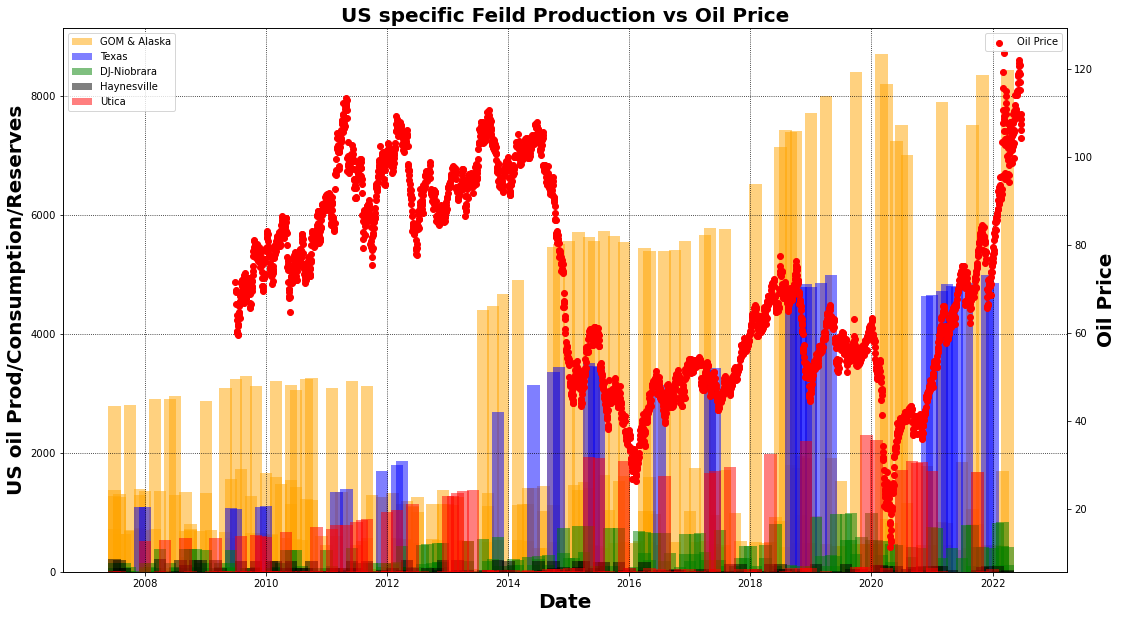

<Figure size 1080x576 with 0 Axes>

In [73]:
fig, ax1 = plt.subplots()
ax1.set_title("US specific Feild Production vs Oil Price", fontweight='bold', fontsize = '20')
ax1.bar(df2['period'], df2['value'],color='orange', alpha = 0.5, width = 75, label = 'GOM & Alaska')
ax1.bar(df2a['period'], df2a['value'],color='blue', alpha = 0.5, width = 75, label = 'Texas')

ax1.bar(df2b['period'], df2b['value'],color='green', alpha = 0.5, width = 75, label = 'DJ-Niobrara')
ax1.bar(df2c['period'], df2c['value'],color='black', alpha = 0.5, width = 75, label = 'Haynesville')
ax1.bar(df2d['period'], df2d['value'],color='red', alpha = 0.5, width = 75, label = 'Utica')
# ax1.bar(us_oilres_df['year'], us_oilres_df['us_reserves'],color='red', alpha = 0.4, width = 200, label = 'US Oil Reserves')
ax1.set_xlabel('Date', fontweight='bold', fontsize = '20')
# ax1.set_ylim(-25, 50)
ax1.set_ylabel('US oil Prod/Consumption/Reserves', fontweight='bold', fontsize = '20')
ax1.grid(True, color = 'k', linestyle= ":")
ax1.legend(loc=2)

ax2 = ax1.twinx()
ax2.scatter(oil_price_df['Date'], oil_price_df['oil_price'],marker='o',color='red', label = 'Oil Price')
ax2.set_ylabel('Oil Price', fontweight='bold', fontsize = '20')
plt.xticks(rotation = 45)
# ax2.set_ylim(-50, 150)

plt.figure(figsize=(15, 8))
rcParams['figure.figsize']= 18,10
ax2.legend(loc=1)